<a href="https://colab.research.google.com/github/CrownClowned/CODEJAM/blob/main/Video_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***VIDEO PREPROCESSING***

## Import Libraries

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
# from keras.preprocessing import image
import numpy as np 
# from keras.utils import np_utils 
from skimage.transform import resize
# import subprocess as sp
# import multiprocessing as mp
from skimage.feature import hog
from skimage import exposure
import itertools
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import plotly.express as px
# from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
training_set=[]
training_labels=[]
accuracy_array = []
# cnn_frames_input=[]
# cnn_labels_input=[]

## **PRE PROCESSING**

In [ ]:
def pre_process(root,label):
    # print(os.getcwd())
    # label = 0
    # root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
    # filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    # for folder in os.listdir(root):
    #   cwd = os.path.join(root + '/' + folder)
    folder = (root.split("/"))[-1]
    print(folder)
    # if(folder != 'Brightness' or folder != 'Original'):
    #   return
    # os.mkdir(folder)
    for file in os.listdir(root):
      cap = cv2.VideoCapture(os.path.join(root + '/' + file)) 
      # print(cap.get(cv2.CAP_PROP_POS_MSEC)) 
      # os.mkdir(folder+"/"+file[:-4])
      i=0
      # if (folder.startswith('Original')):
      #       label=0
      # else:
      #       label=1

      # frame_list=[]
      cnn_per_frame=[]
      # print(label)
      while(cap.isOpened()):
        # print(label)
        retn, frame = cap.read()
        # if(label == 0):
        #   training_labels.append(0)
        # else:
        #   training_labels.append(1)
        if(retn != True):
          break
        if (i%math.floor(20)==0):
          frame1=frame
          resized_img = resize(frame1, (64, 32),anti_aliasing=False)
          resized = cv2.resize(frame1, (64,32), interpolation = cv2.INTER_AREA)
          # cnn_frames_input.append(resized)
          # cnn_labels_input.append(label)
          feature_list=[]

          gray_img = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
          blur_img = cv2.GaussianBlur(gray_img,(5,5),cv2.BORDER_DEFAULT)
          edgex = cv2.Sobel(blur_img,cv2.CV_8U,1,0,ksize=5)
          edgey = cv2.Sobel(blur_img,cv2.CV_8U,0,1,ksize=5)
          img_sobel = edgex + edgey
        
          fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)

          img_sobel2=list(itertools.chain(*img_sobel))
          hog_img2=list(itertools.chain(*hog_image))

          feature_list=img_sobel2+hog_img2
          training_set.append(feature_list)
          training_labels.append(label)
          # print(training_labels)
          

        i = i+1

  
      
      cap.release()
      cv2.destroyAllWindows()
    # root = 'gdrive/MyDrive/Tampered Video Dataset'
    # print(os.listdir(root))

# **TRAIN AND PREDICT BRIGHTNESS**

In [ ]:
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Brightness'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Scaling
Flipping
Rotation
RGB
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Shearing
Rotation
RGB
Multiple
Flipping
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Rotation
Shearing
RGB
Multiple
Flipping
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Shearing
Rotation
RGB
Flipping
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Scaling
RGB
Flipping
Rotation
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


In [ ]:
print(len(training_set[0]))
# print(training_labels)
# print(training_set)

4096


In [ ]:
# plt.hist(training_set)
# plt.title("Training Set Histogram")
# plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import StratifiedKFold

In [ ]:
print(len(training_labels))
print(np.unique(training_labels))

321
[0 1]


In [ ]:
def lr():
  xtrain, xtest, ytrain, ytest = train_test_split(
          training_set, training_labels, test_size = 0.25, random_state = 0)
  sc_x = StandardScaler()
  xtrain = sc_x.fit_transform(xtrain)
  xtest = sc_x.transform(xtest)
  classifier = LogisticRegression(random_state = 2, max_iter=500)
  classifier.fit(xtrain, ytrain)
  y_pred = classifier.predict(xtest)
  cm = confusion_matrix(ytest, y_pred, normalize='true') 
  print ("Confusion Matrix : \n", cm)
  print("\n")
  ac = metrics.accuracy_score(ytest, y_pred)
  accuracy_array.append(ac)
  print ("Accuracy : ", ac)
  print("\n")
  print("Precision : ", metrics.precision_score(ytest, y_pred))
  print("\n")
  prob = [0 for i in range(len(ytest))]
  fpr, tpr, _ = metrics.roc_curve(ytest, prob)
  lfpr, ltpr, _ = metrics.roc_curve(ytest, y_pred)
  plt.plot(fpr, tpr, linestyle="--", label='No Skill')
  plt.plot(lfpr, ltpr, marker=".", label='Logistics')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend()
  # plt.scatter(lfpr, ltpr) 
  plt.show()
  print("\n")
  plot(cm)
  # plt.hist(cm[0][1],cm[1][0],density = True, histtype = 'bar',color = 'Blue', label = 'Black')
  # plt.legend()
  # plt.show()


In [ ]:
def plot(cm):
  plt.figure()
  sns.heatmap(cm, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('Testing Confusion Matrix')
  # plt.hist(cm[0][1],cm[1][0],density = True, histtype = 'bar',color = 'Blue', label = 'Black')
  # plt.legend()
  # plt.show()

# px.scatter(training_labels.sample(10),title="Testing Confusion Matrix",x='Target',y='Prediction')

Confusion Matrix : 
 [[0.76470588 0.23529412]
 [0.03125    0.96875   ]]


Accuracy :  0.9259259259259259


Precision :  0.9393939393939394




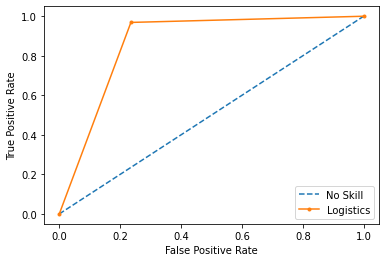

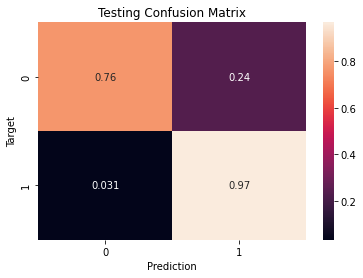

In [ ]:
lr()

# **TRAIN AND PREDICT SHEARING**

In [ ]:
training_set=[]
training_labels=[]
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Shearing'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Shearing
Scaling
Flipping
Rotation
RGB
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Shearing
Shearing
Rotation
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Rotation
Shearing
Shearing
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Shearing
Shearing
Rotation
RGB
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Shearing
Scaling
RGB
Flipping
Rotation
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


Confusion Matrix : 
 [[0.55555556 0.44444444]
 [0.21212121 0.78787879]]


Accuracy :  0.7058823529411765


Precision :  0.7647058823529411




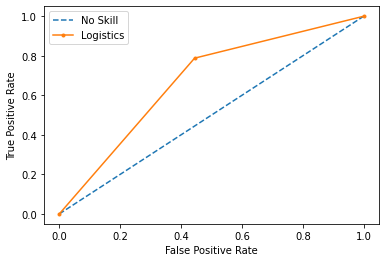

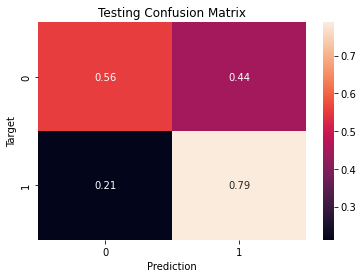

In [ ]:
lr()

# **TRAIN AND PREDICT ROTATION**

In [ ]:
training_set=[]
training_labels=[]
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Rotation'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Scaling
Flipping
Rotation
Rotation
RGB
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Shearing
Rotation
Rotation
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Rotation
Rotation
Shearing
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Shearing
Rotation
Rotation
RGB
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Scaling
RGB
Flipping
Rotation
Rotation
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


Confusion Matrix : 
 [[0.58333333 0.41666667]
 [0.12765957 0.87234043]]


Accuracy :  0.7746478873239436


Precision :  0.803921568627451




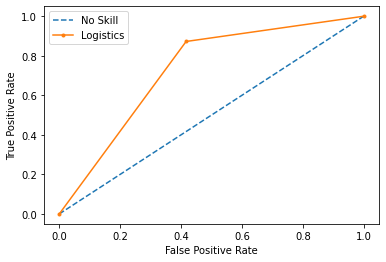

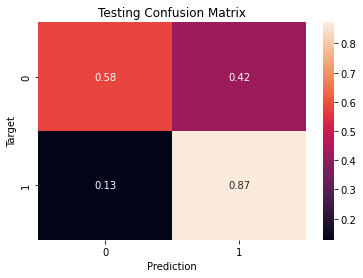

In [ ]:
lr()

# **TRAIN AND PREDICT RGB**

In [ ]:
training_set=[]
training_labels=[]
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'RGB'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Scaling
Flipping
Rotation
RGB
RGB
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Shearing
Rotation
RGB
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Rotation
Shearing
RGB
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Shearing
Rotation
RGB
RGB
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Scaling
RGB
RGB
Flipping
Rotation
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


Confusion Matrix : 
 [[0.45       0.55      ]
 [0.02040816 0.97959184]]


Accuracy :  0.8260869565217391


Precision :  0.8135593220338984




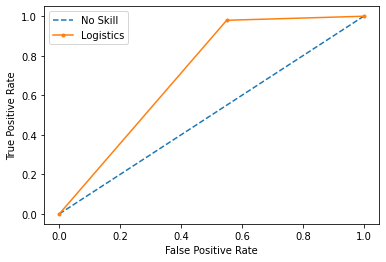

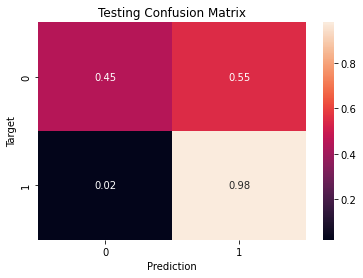

In [ ]:
lr()

# **TRAIN AND PREDICT SCALING**

In [ ]:
training_set=[]
training_labels=[]
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Scaling'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Scaling
Scaling
Flipping
Rotation
RGB
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Scaling
Shearing
Rotation
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Scaling
Rotation
Shearing
RGB
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Scaling
Shearing
Rotation
RGB
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Scaling
Scaling
RGB
Flipping
Rotation
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


Confusion Matrix : 
 [[0.55       0.45      ]
 [0.19354839 0.80645161]]


Accuracy :  0.7058823529411765


Precision :  0.7352941176470589




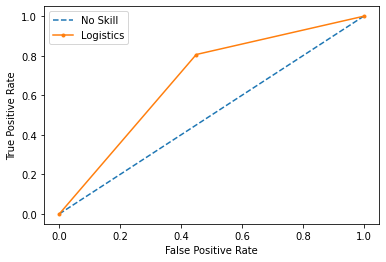

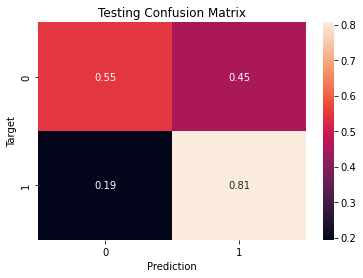

In [ ]:
lr()

# **TRAIN AND PREDICT FLIPPING**

In [ ]:
training_set=[]
training_labels=[]
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Flipping'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Scaling
Flipping
Flipping
Rotation
RGB
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Shearing
Rotation
RGB
Multiple
Flipping
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Rotation
Shearing
RGB
Multiple
Flipping
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Shearing
Rotation
RGB
Flipping
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Scaling
RGB
Flipping
Flipping
Rotation
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


Confusion Matrix : 
 [[0.4        0.6       ]
 [0.14285714 0.85714286]]


Accuracy :  0.7096774193548387


Precision :  0.75




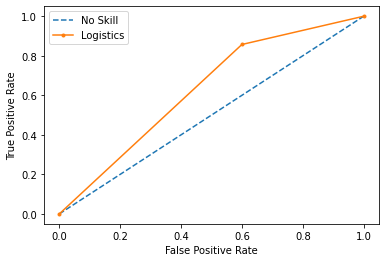

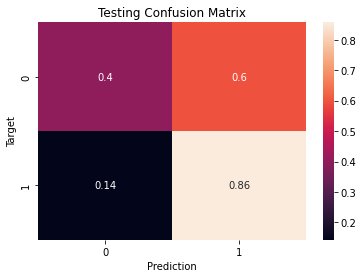

In [ ]:
lr()

# **TRAIN AND PREDICT MULTIPLE**

In [ ]:
training_set=[]
training_labels=[]
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Multiple'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Scaling
Flipping
Rotation
RGB
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Shearing
Rotation
RGB
Multiple
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Rotation
Shearing
RGB
Multiple
Multiple
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Shearing
Rotation
RGB
Flipping
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Scaling
RGB
Flipping
Rotation
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


Confusion Matrix : 
 [[0.68421053 0.31578947]
 [1.         0.        ]]


Accuracy :  0.52


Precision :  0.0




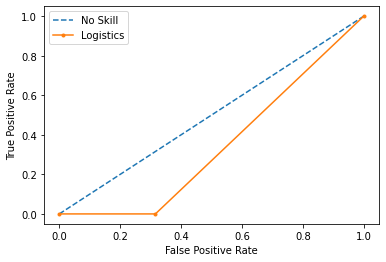

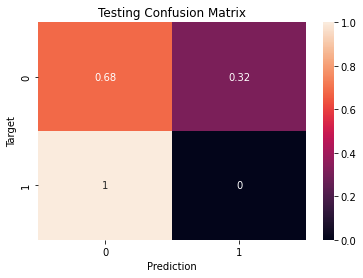

In [ ]:
lr()

**END**

In [ ]:
training_set=np.array(training_set)
training_labels=np.array(training_labels)
sc = StandardScaler()
# for i in range (0,len(training_set)-1):
#   sc.fit(training_set[i])
#   X=sc.transform(training_set[i])
  
sc.fit(training_set)
X = sc.transform(training_set)

y=training_labels
# y.reshape(-1,1)
#sc.fit(training_set)
# X = sc.transform(training_set)

# for k in range (0,len(training_set)-1):
#   sc.fit(training_labels)
#   y=sc.transform(training_labels)
#   k=k+1


kfold = StratifiedKFold(n_splits=4,shuffle=True)
svc = SVC(gamma='auto',C=0.06)
cv_results = cross_val_score(svc, X, y, cv=kfold, scoring='accuracy')

result=cv_results.mean()



print(result)
# svm = SGDClassifier(loss='hinge')
# svm.fit(X, y)


0.7779166666666667


In [ ]:
# test= os.path.join(os.getcwd(), 'gdrive/MyDrive/test_set')

testing_set=[]
testing_labels=[]
# cnn_frames_test=[]
# cnn_labels_test=[]


In [ ]:
import shutil
# shutil.rmtree("tampered_6")
# shutil.rmtree("tampered_5")
# shutil.rmtree("tampered_4")
# shutil.rmtree("tampered_3")
# shutil.rmtree("tampered_2")
# shutil.rmtree("tampered_1")
# shutil.rmtree("original")

In [ ]:
# import os
# print(os.getcwd())
# root = os.path.join(os.getcwd(), 'gdrive/MyDrive/test_set')
# # filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# for folder in os.listdir(root):
#   cwd = os.path.join(root + '/' + folder)
#   print(cwd)
#   # os.mkdir(folder)
#   for file in os.listdir(cwd):
#     cap = cv2.VideoCapture(os.path.join(cwd + '/' + file)) 
#     # print(cap.get(cv2.CAP_PROP_POS_MSEC)) 
#     # os.mkdir(folder+"/"+file[:-4])
#     i=0
#     if (folder.startswith('original')):
#           label_test=0
#     else:
#           label_test=1

#     frame_list_test=[]
#     cnn_per_frame_test=[]
#     while(cap.isOpened()):
#       retn, frame = cap.read()
#       if(retn != True):
#         break
#       if (i%math.floor(20)==0):
#         frame1=frame
#         resized_img = resize(frame1, (64, 32),anti_aliasing=False)
#         resized = cv2.resize(frame1, (64,32), interpolation = cv2.INTER_AREA)
#         cnn_frames_input.append(resized)
#         cnn_labels_input.append(label)
#         feature_list_test=[]

#         gray_img = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#         blur_img = cv2.GaussianBlur(gray_img,(5,5),cv2.BORDER_DEFAULT)
#         edgex = cv2.Sobel(blur_img,cv2.CV_8U,1,0,ksize=5)
#         edgey = cv2.Sobel(blur_img,cv2.CV_8U,0,1,ksize=5)
#         img_sobel = edgex + edgey
#         # xarr = np.squeeze(np.array(gray_img).astype(np.float32))
#         # m,v = cv2.PCACompute(xarr, mean = np.array([]))
#         # arr = np.array(v)
#         # laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
#         # laplacian_f = cv2.convertScaleAbs(laplacian)
#         # edges = cv2.Canny(image=laplacian_f, threshold1=100, threshold2=150)
#         fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)

#         img_sobel2=list(itertools.chain(*img_sobel))
#         hog_img2=list(itertools.chain(*hog_image))

#         # flat_arr = arr.ravel()
#         feature_list_test=img_sobel2+hog_img2
#         # feature_np = np.hstack(feature_list)
#         # print(len(feature_list))
#         frame_list_test.append(feature_list)
        
        

#         # result = np.zeros([578, 960],dtype = int)
#         # result[:gray_img.shape[0],:gray_img.shape[1]] = gray_img
        
#         # cv2.imwrite(os.path.join(folder+"/"+file[:-4],file[:-4] + '_Frame' + str(i//20) + '.jpg'), result)
#       i = i+1

#     # print(len(frame_list))
#     # training_set.append(frame_list)
#     # training_labels.append(label)
#     testing_set.append(frame_list_test)
#     testing_labels.append(label_test)
    
#     cap.release()
#     cv2.destroyAllWindows()
#   #sift = cv2.SIFT_create()
#   #keypoints, descriptors = sift.detectAndCompute(frame, None)
#   #sift_image = cv2.drawKeypoints(gray_img, keypoints, frame)
# print(os.listdir(root))
def t_pre_process(root,label):
    folder = (root.split("/"))[-1]
    print(folder)
    # if(folder != 'Brightness' or folder != 'Original'):
    #   return
    # os.mkdir(folder)
    for file in os.listdir(root):
      cap = cv2.VideoCapture(os.path.join(root + '/' + file)) 
      # print(cap.get(cv2.CAP_PROP_POS_MSEC)) 
      # os.mkdir(folder+"/"+file[:-4])
      i=0
      # if (folder.startswith('Original')):
      #       label=0
      # else:
      #       label=1

      # frame_list=[]
      cnn_per_frame=[]
      frame_list_test=[]
      # print(label)
      while(cap.isOpened()):
        # print(label)
        retn, frame = cap.read()
        # if(label == 0):
        #   training_labels.append(0)
        # else:
        #   training_labels.append(1)
        if(retn != True):
          break
        if (i%math.floor(20)==0):
          frame1=frame
          resized_img = resize(frame1, (64, 32),anti_aliasing=False)
          resized = cv2.resize(frame1, (64,32), interpolation = cv2.INTER_AREA)
          # cnn_frames_input.append(resized)
          # cnn_labels_input.append(label)
          feature_list=[]

          gray_img = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
          blur_img = cv2.GaussianBlur(gray_img,(5,5),cv2.BORDER_DEFAULT)
          edgex = cv2.Sobel(blur_img,cv2.CV_8U,1,0,ksize=5)
          edgey = cv2.Sobel(blur_img,cv2.CV_8U,0,1,ksize=5)
          img_sobel = edgex + edgey
        
          fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)

          img_sobel2=list(itertools.chain(*img_sobel))
          hog_img2=list(itertools.chain(*hog_image))

# flat_arr = arr.ravel()
#         feature_list_test=img_sobel2+hog_img2
#         # feature_np = np.hstack(feature_list)
#         # print(len(feature_list))
#         frame_list_test.append(feature_list)
          feature_list=img_sobel2+hog_img2
          frame_list_test.append(feature_list)
#         # feature_np = np.hstack(feature_list)
#         # print(len(feature_list))
          frame_list_test.append(feature_list)
          testing_set.append(frame_list_test)
          testing_labels.append(label)
          # print(training_labels)
          

        i = i+1

  
      
      cap.release()
      cv2.destroyAllWindows()

In [ ]:
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/test_set')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/test_set/Original' :
    t_pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Brightness'):
        wd = os.path.join(cwd + '/' + ifolder)
        t_pre_process(wd,1)

/content/gdrive/MyDrive/test_set/original
video_pro6.avi
/content/gdrive/MyDrive/test_set/video_pro6
Scaling
Rotation
RGB
Multiple
Flipping
No Transformation
Shearing
Brightness
Brightness


In [ ]:
# for test_set in os.listdir(test):
#   cwd1 = os.path.join(test + '/' + test_set)
#   print(cwd1)
#   os.mkdir(test_set)
#   for file in os.listdir(cwd1):
#     cap1 = cv2.VideoCapture(os.path.join(cwd1 + '/' + file)) 
#     # print(cap.get(cv2.CAP_PROP_POS_MSEC)) 
#     os.mkdir(test_set+"/"+file[:-4])
#     j=0
#     if (test_set.startswith('original')):
#           label_test=1
#     else:
#           label_test=0

#     frame_list_test=[]
#     cnn_per_frame_test=[]
#     while(cap1.isOpened()):
#       retn1, frame2 = cap1.read()
#       if(retn1 != True):
#         break
#       if (j%math.floor(20)==0):
#         frame3 =frame2
#         resized_img_test = resize(frame3, (64, 32),anti_aliasing=False)
#         resized_test = cv2.resize(frame3, (64,32), interpolation = cv2.INTER_AREA)
#         cnn_frames_test.append(resized_test)
#         cnn_labels_test.append(label_test)
#         feature_list_test=[]

#         gray_img_test = cv2.cvtColor(resized_test, cv2.COLOR_BGR2GRAY)
#         blur_img_test = cv2.GaussianBlur( gray_img_test,(5,5),cv2.BORDER_DEFAULT)
#         edgext = cv2.Sobel(blur_img_test,cv2.CV_8U,1,0,ksize=5)
#         edgeyt = cv2.Sobel(blur_img_test,cv2.CV_8U,0,1,ksize=5)
#         img_sobelt = edgext + edgeyt
#         # xarr = np.squeeze(np.array(gray_img).astype(np.float32))
#         # m,v = cv2.PCACompute(xarr, mean = np.array([]))
#         # arr = np.array(v)
#         # laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
#         # laplacian_f = cv2.convertScaleAbs(laplacian)
#         # edges = cv2.Canny(image=laplacian_f, threshold1=100, threshold2=150)
#         fdt, hog_image_test = hog(resized_img_test, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)

#         img_sobel2t=list(itertools.chain(*img_sobelt))
#         hog_img2t=list(itertools.chain(*hog_image_test))

#         # flat_arr = arr.ravel()
#         feature_list_test=img_sobel2t+hog_img2t
#         # feature_np = np.hstack(feature_list)
#         # print(len(feature_list))
#         frame_list.append(feature_list_test)
        

#         # result = np.zeros([578, 960],dtype = int)
#         # result[:gray_img.shape[0],:gray_img.shape[1]] = gray_img
        
#         # cv2.imwrite(os.path.join(test_set+"/"+file[:-4],file[:-4] + '_Frame' + str(i//20) + '.jpg'), result)
#       j = j+1

#     print(len(frame_list_test))
#     testing_set.append(frame_list_test)
#     testing_labels.append(label_test)
    
#     cap1.release()
#     cv2.destroyAllWindows()
#   #sift = cv2.SIFT_create()
#   #keypoints, descriptors = sift.detectAndCompute(frame, None)
#   #sift_image = cv2.drawKeypoints(gray_img, keypoints, frame)
# print(os.listdir(test))

In [ ]:
import statistics as st
from sklearn.metrics import accuracy_score
len(testing_set)

24

In [ ]:

svc.fit(training_set,training_labels)
y_predict_ans=[]
X_test=[]
for i in range(24):
  # actual_label=testing_labels[i]
  X_test=np.array(testing_set[i])
  # X_test[i]=sc.transform(testing_set[i])
  y_predict=svc.predict(X_test)
  # print(y_predict)
  y_predict_ans.append(st.mode(y_predict))
  # print("\n")
  # print(y_predict_ans)
  # print("\n")
  
y_predict_ans=np.array(y_predict_ans) 
      #  break
#       if (j%math.floor(20)==0):
#         frame3 =frame2
#         resized_img_test = resize(frame3, (64, 32),anti_aliasing=False)
#         resized_test = cv2.resize(frame3, (64,32), interpolation = cv2.INTER_AREA)
#         cnn_frames_test.append(resized_test)
#         cnn_labels_test.append(label_test)
#         feature_list_test=[]

#         gray_img_test = cv2.cvtColor(resized_test, cv2.COLOR_BGR2GRAY)
#         blur_img_test = cv2.GaussianBlur( gray_img_test,(5,5),cv2.BORDER_DEFAULT)
#         edgext = cv2.Sobel(blur_img_test,cv2.CV_8U,1,0,ksize=5)
#         edgeyt = cv2.Sobel(blur_img_test,cv2.CV_8U,0,1,ksize=5)
#         img_sobelt = edgext + edgeyt
#         # xarr = np.squeeze(np.array(gray_img).astype(np.float32))
#         # m,v = cv2.PCACompute(xarr, mean = np.array([]))
#         # arr = np.array(v)
#         # laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
#         # laplacian_f = cv2.convertScaleAbs(laplacian)
#         # edges = cv2.Canny(image=laplacian_f, threshold1=100, threshold2=150)
#         fdt, hog_image_test = hog(resized_img_test, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)

#         img_sobel2t=list(itertools.chain(*img_sobelt))
#         hog_img2t=list(itertools.chain(*hog_image_test))

#         # flat_arr = arr.ravel()
#         feature_list_test=img_sobel2t+hog_img2t
#         # feature_np = np.hstack(feature_list)
#         # print(len(feature_list))
#         frame_list.append(feature_list_test)
        

#         # result = np.zeros([578, 960],dtype = int)
#         # result[:gray_img.shape[0],:gray_img.shape[1]] = gray_img
        
print(accuracy_score(testing_labels,y_predict_ans))

# gray_img_test = cv2.cvtColor(resized_test, cv2.COLOR_BGR2GRAY)
# blur_img_test = cv2.GaussianBlur( gray_img_test,(5,5),cv2.BORDER_DEFAULT)
# edgext = cv2.Sobel(blur_img_test,cv2.CV_8U,1,0,ksize=5)
# edgeyt = cv2.Sobel(blur_img_test,cv2.CV_8U,0,1,ksize=5)
# img_sobelt = edgext + edgeyt
        # xarr = np.squeeze(np.array(gray_img).astype(np.float32))
        # m,v = cv2.PCACompute(xarr, mean = np.array([]))
#         # arr = np.array(v)
#         # laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
# for test_set in os.listdir(test):
#   cwd1 = os.path.join(test + '/' + test_set)
#   print(cwd1)
#   os.mkdir(test_set)
#   for file in os.listdir(cwd1):
#     cap1 = cv2.VideoCapture(os.path.join(cwd1 + '/' + file)) 
#     # print(cap.get(cv2.CAP_PROP_POS_MSEC)) 
#     os.mkdir(test_set+"/"+file[:-4])
#     j=0
#     if (test_set.startswith('original')):
#           label_test=1
#     else:
#           label_test=0
# print(80.21428571428571)
#     frame_list_test=[]
#     cnn_per_frame_test=[]
#     while(cap1.isOpened()):
#       retn1, frame2 = cap1.read()
#       if(retn1 != True):
#         break
#       if (j%math.floor(20)==0):
#         frame3 =frame2
#         resized_img_test = resize(frame3, (64, 32),anti_aliasing=False)
#         resized_test = cv2.resize(frame3, (64,32), interpolation = cv2.INTER_AREA)
#         cnn_frames_test.append(resized_test)
#         cnn_labels_test.append(label_test


80.21428571428571


In [ ]:
training_set=[]
training_labels=[]
root = os.path.join(os.getcwd(), 'gdrive/MyDrive/Tampered Video Dataset')
# os.mkdir("Augmented_brightness")
count=0
for folder in os.listdir(root):
  cwd = os.path.join(root + '/' + folder)
  print(cwd)
  if cwd=='/content/gdrive/MyDrive/Tampered Video Dataset/Original' :
    pre_process(cwd,0)
  else:
    for ifolder in os.listdir(cwd):
      print(ifolder)
      if(ifolder == 'Brightness'):
        wd = os.path.join(cwd + '/' + ifolder)
        pre_process(wd,1)

/content/gdrive/MyDrive/Tampered Video Dataset/video_pro2
Shearing
Scaling
Flipping
Rotation
RGB
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro1
Scaling
Shearing
Rotation
RGB
Multiple
Flipping
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro4
Scaling
Rotation
Shearing
RGB
Multiple
Flipping
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro5
Scaling
Shearing
Rotation
RGB
Flipping
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/video_pro3
Shearing
Scaling
RGB
Flipping
Rotation
Brightness
Brightness
/content/gdrive/MyDrive/Tampered Video Dataset/Original
Original


Confusion Matrix : 
 [[0.76470588 0.23529412]
 [0.03125    0.96875   ]]


Accuracy :  0.9259259259259259


Precision :  0.9393939393939394




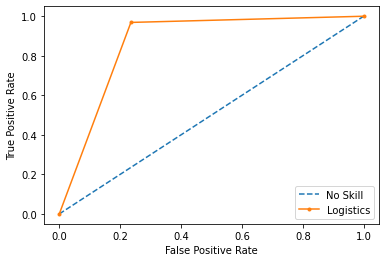

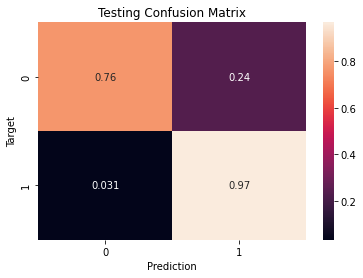

In [ ]:
lr()

In [ ]:
s = sum(accuracy_array)
length = len(accuracy_array)
avg = s/length
print(avg)

0.7617536026168408
